In [52]:
import os
os.chdir("C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning\\Logistic Regression\\h1n1_dataset")
import pandas as pd
import numpy as np
pd.set_option("display.max_column",None)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

In [53]:
df = pd.read_csv("hnsmote.csv")
df

,Unnamed: 0,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_risky,age_bracket,sex,marital_status,housing_status,employment,h1n1_vaccine,race_1,race_2,race_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,3,0,1,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,1,1,1,1,2,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,4.0,4,0,1,1,1,0,0,0,1
3,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2,0,0,0,2,0,0,0,1
4,4,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,4.0,4,1,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30251,18654,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,0,1,1,0,2,1,0,0,1
30252,11916,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,4,0,1,0,1,1,0,0,1
30253,7137,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,2,0,1,0,2,1,0,0,1
30254,12817,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,0,1,1,0,1,1,0,0,1


In [54]:
df.shape

(30256, 27)

In [55]:
df.columns

Index(['Unnamed: 0', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_risky', 'sick_from_h1n1_vacc',
       'is_seas_risky', 'age_bracket', 'sex', 'marital_status',
       'housing_status', 'employment', 'h1n1_vaccine', 'race_1', 'race_2',
       'race_3'],
      dtype='object')

In [56]:
# Logistic Regression model - GLM Method
import statsmodels.api as sm
import statsmodels.formula.api as smf
model_glm = smf.glm(formula = '''h1n1_vaccine ~ h1n1_worry+h1n1_awareness+antiviral_medication
       +contact_avoidance+bought_face_mask+wash_hands_frequently
       +avoid_large_gatherings+reduced_outside_home_cont
       +avoid_touch_face+dr_recc_h1n1_vacc+dr_recc_seasonal_vacc
       +chronic_medic_condition+cont_child_undr_6_mnths
       +is_health_worker+is_h1n1_risky+sick_from_h1n1_vacc
       +is_seas_risky+age_bracket+sex+marital_status
       +housing_status+employment+race_1+race_2
       +race_3''', data = df, family = sm.families.Binomial())
result = model_glm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                30256
Model:                            GLM   Df Residuals:                    30230
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15789.
Date:                Thu, 15 Dec 2022   Deviance:                       31578.
Time:                        22:52:27   Pearson chi2:                 3.14e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2901
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [57]:
prediction_glm = result.predict()
predictions_nominal3 =[0 if x < 0.5 else 1 for x in prediction_glm]
predictions_nominal3

# Confusion Matrix
print(confusion_matrix(df["h1n1_vaccine"],predictions_nominal3))

[[11837  3291]
 [ 4148 10980]]


In [58]:
# ROC & AUC
fpr3, tpr3 , thresholds3 = roc_curve(df["h1n1_vaccine"],predictions_nominal3)
roc_auc3 = auc(fpr3, tpr3) # Area under the curve 0.82
print(roc_auc3)

0.7541314119513485


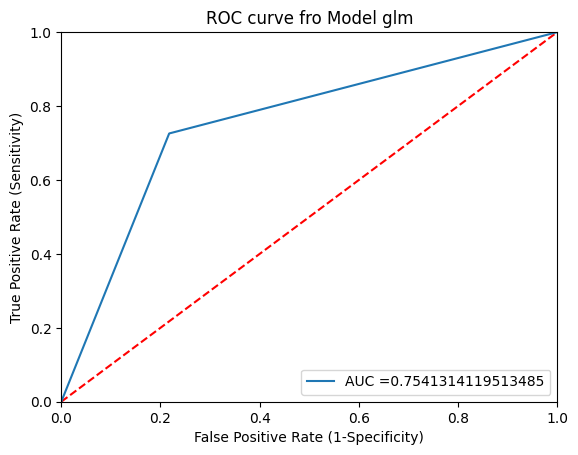

In [59]:
# ROC Curve
plt.title("ROC curve fro Model glm")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.plot([0,1], [0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3, tpr3, label = "AUC =" + str(roc_auc3))
plt.legend(loc = 4)
plt.show()

In [60]:
# Classification report 
print(classification_report(df["h1n1_vaccine"],predictions_nominal3, digits = 3))

              precision    recall  f1-score   support

           0      0.741     0.782     0.761     15128
           1      0.769     0.726     0.747     15128

    accuracy                          0.754     30256
   macro avg      0.755     0.754     0.754     30256
weighted avg      0.755     0.754     0.754     30256



In [61]:
# model_glm2 following 5 had high p_value, removed
#h1n1_worry, contact_avoidance, avoid_touch_face, housing_status, employment, race_1  

In [62]:
# Logistic Regression model - GLM Method
model_glm = ols.glm(formula = '''h1n1_vaccine~h1n1_awareness+antiviral_medication
       +bought_face_mask+wash_hands_frequently
       +avoid_large_gatherings+reduced_outside_home_cont
       +dr_recc_h1n1_vacc+dr_recc_seasonal_vacc
       +chronic_medic_condition+cont_child_undr_6_mnths
       +is_health_worker+is_h1n1_risky+sick_from_h1n1_vacc
       +is_seas_risky+age_bracket+sex+marital_status
       +race_2+race_3''', data = df, family = sm.families.Binomial())
result2 = model_glm.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                30256
Model:                            GLM   Df Residuals:                    30236
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15791.
Date:                Thu, 15 Dec 2022   Deviance:                       31581.
Time:                        22:52:52   Pearson chi2:                 3.14e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2900
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [63]:
prediction_glm2 = result2.predict()
prediction_nominal4 = [0 if x < 0.5 else 1 for x in prediction_glm2]
prediction_nominal4

# Confusion Matrix
print(confusion_matrix(df["h1n1_vaccine"], prediction_nominal4))

[[11823  3305]
 [ 4153 10975]]


In [64]:
# ROC & AUC
fpr4, tpr4, thresolds4 = roc_curve(df["h1n1_vaccine"], prediction_nominal4)
roc_auc4 = auc(fpr4, tpr4)
print(roc_auc4)

0.7535034373347435


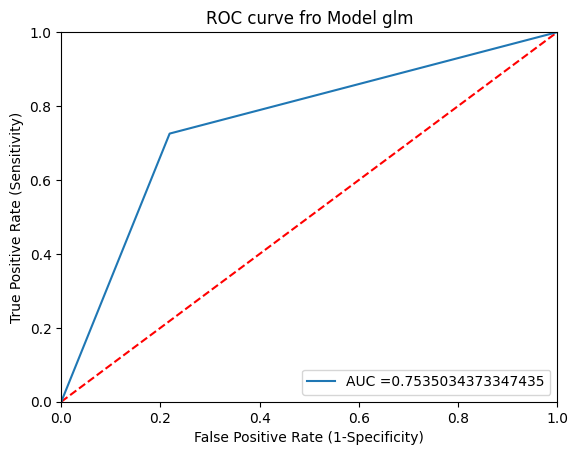

In [65]:
# ROC curve
# ROC Curve
plt.title("ROC curve fro Model glm")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.plot([0,1], [0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4, tpr4, label = "AUC =" + str(roc_auc4))
plt.legend(loc = 4)
plt.show()

In [66]:
# Classification Report 
print(classification_report(df["h1n1_vaccine"], prediction_nominal4, digits =3))

              precision    recall  f1-score   support

           0      0.740     0.782     0.760     15128
           1      0.769     0.725     0.746     15128

    accuracy                          0.754     30256
   macro avg      0.754     0.754     0.753     30256
weighted avg      0.754     0.754     0.753     30256

